In [52]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [53]:
df_DA = df[(df['job_title_short'] == 'Data Analyst')].copy()

df_DA  = df_DA.dropna(subset = ['salary_year_avg'])

In [54]:
df_DA.head(1)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."


In [55]:
df_exploded = df_DA.explode('job_skills')

In [56]:
df_exploded = df_DA.explode('job_skills')

df_grouped = df_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_DA_toppay = df_grouped.sort_values(by='median', ascending=False).iloc[1:11]   #Ignoring an outlier

df_DA_skills = df_grouped.sort_values(by= 'count', ascending=False).head(10).sort_values(by='median', ascending=False)

df_DA_toppay

,count,median
job_skills,,
solidity,1,179000.0
dplyr,3,167500.0
gitlab,7,163782.0
terraform,3,163782.0
couchbase,1,160515.0
datarobot,1,155485.5
golang,2,155000.0
mxnet,2,149000.0
vmware,1,147500.0


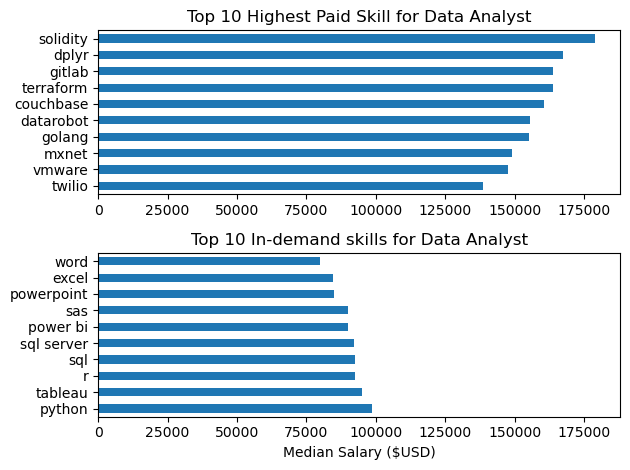

In [61]:
fig, ax = plt.subplots(2,1)

df_DA_toppay.plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skill for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')


df_DA_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 In-demand skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()

In [ ]:
df_DA_toppay

,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0
